In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style="darkgrid")


In [5]:
df = pd.read_csv('developer_stress.csv')

In [6]:
df.head()

,Hours_Worked,Sleep_Hours,Bugs,Deadline_Days,Coffee_Cups,Meetings,Interruptions,Experience_Years,Code_Complexity,Remote_Work,Stress_Level
0,10,8,25,53,4,9,2,Senior,Medium,Yes,58.521033
1,7,8,33,33,2,6,9,Junior,Medium,Yes,47.461651
2,14,8,44,54,10,12,2,Junior,Low,No,59.211580
3,11,6,5,46,0,13,9,Mid,Low,Yes,100.000000
4,8,7,36,23,9,3,2,Junior,Medium,Yes,28.784957


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hours_Worked      500 non-null    int64  
 1   Sleep_Hours       500 non-null    int64  
 2   Bugs              500 non-null    int64  
 3   Deadline_Days     500 non-null    int64  
 4   Coffee_Cups       500 non-null    int64  
 5   Meetings          500 non-null    int64  
 6   Interruptions     500 non-null    int64  
 7   Experience_Years  500 non-null    object 
 8   Code_Complexity   500 non-null    object 
 9   Remote_Work       500 non-null    object 
 10  Stress_Level      500 non-null    float64
dtypes: float64(1), int64(7), object(3)
memory usage: 43.1+ KB


In [8]:
df.describe()

,Hours_Worked,Sleep_Hours,Bugs,Deadline_Days,Coffee_Cups,Meetings,Interruptions,Stress_Level
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.504000,5.436000,25.150000,30.676000,4.922000,10.164000,4.968000,77.004177
std,3.543317,1.706378,14.909866,17.284691,3.155286,6.227573,3.074717,27.656360
min,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492625
25%,6.000000,4.000000,11.000000,16.000000,2.000000,5.000000,2.000000,56.315125
50%,10.000000,5.000000,26.000000,31.000000,5.000000,10.000000,5.000000,94.139876
75%,13.000000,7.000000,37.000000,45.000000,8.000000,16.000000,8.000000,100.000000
max,15.000000,8.000000,50.000000,60.000000,10.000000,20.000000,10.000000,100.000000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

In [11]:
for col in df.select_dtypes(include='object'):
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


--- Experience_Years ---
Experience_Years
Senior    187
Mid       177
Junior    136
Name: count, dtype: int64

--- Code_Complexity ---
Code_Complexity
Medium    206
High      155
Low       139
Name: count, dtype: int64

--- Remote_Work ---
Remote_Work
No     255
Yes    245
Name: count, dtype: int64


In [12]:
df[categorical_cols].nunique()

Experience_Years    3
Code_Complexity     3
Remote_Work         2
dtype: int64

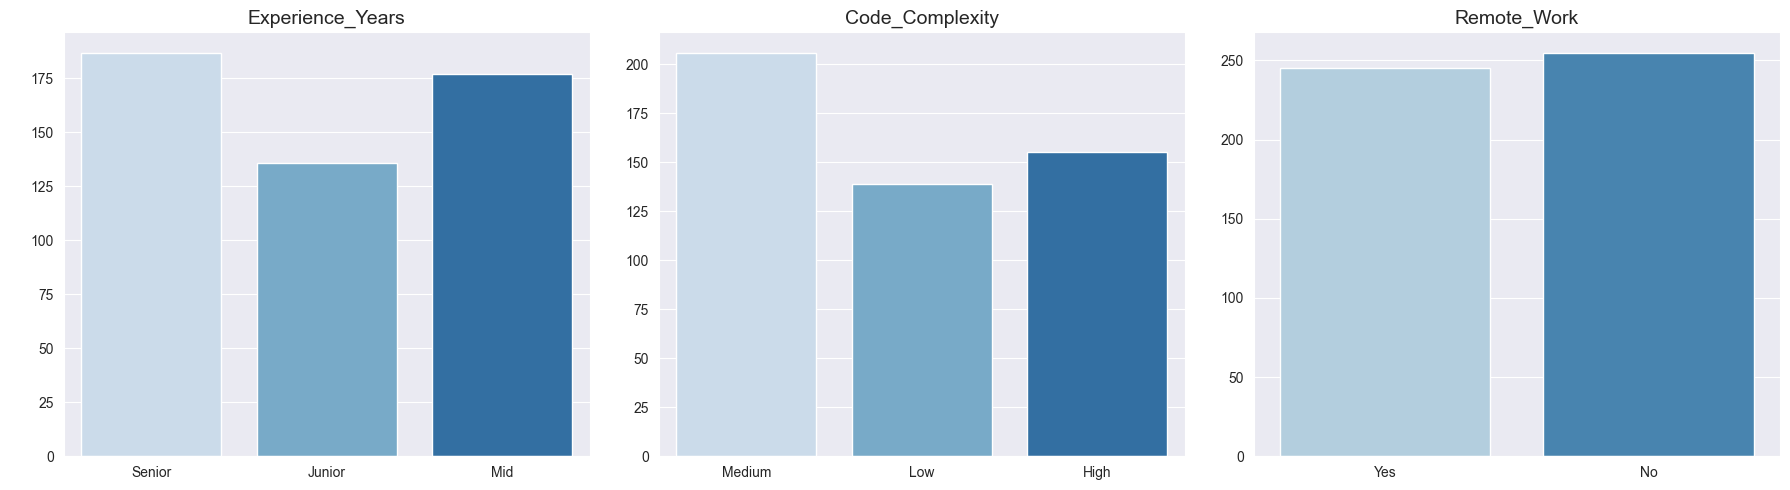

In [13]:
# Distribuciones de variables categóricas
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(6 * len(categorical_cols), 5))

for i, cat in enumerate(categorical_cols):
    sns.set_style("darkgrid")
    sns.countplot(data=df, x=cat, ax=axes[i], palette='Blues')
    axes[i].set_title(cat, fontsize=14)
    axes[i].set_xlabel("", fontsize=12)
    axes[i].set_ylabel(" ", fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

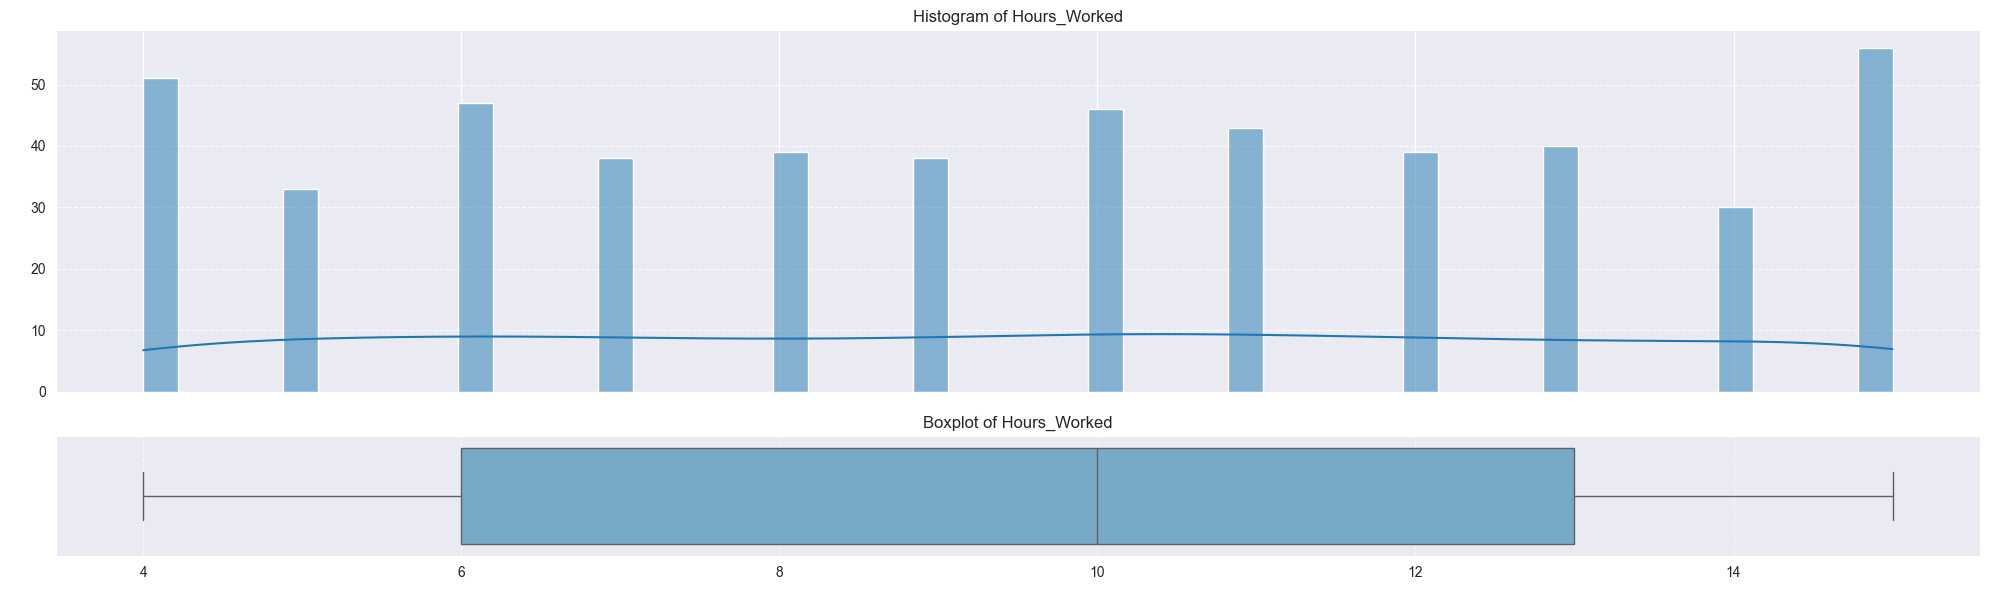

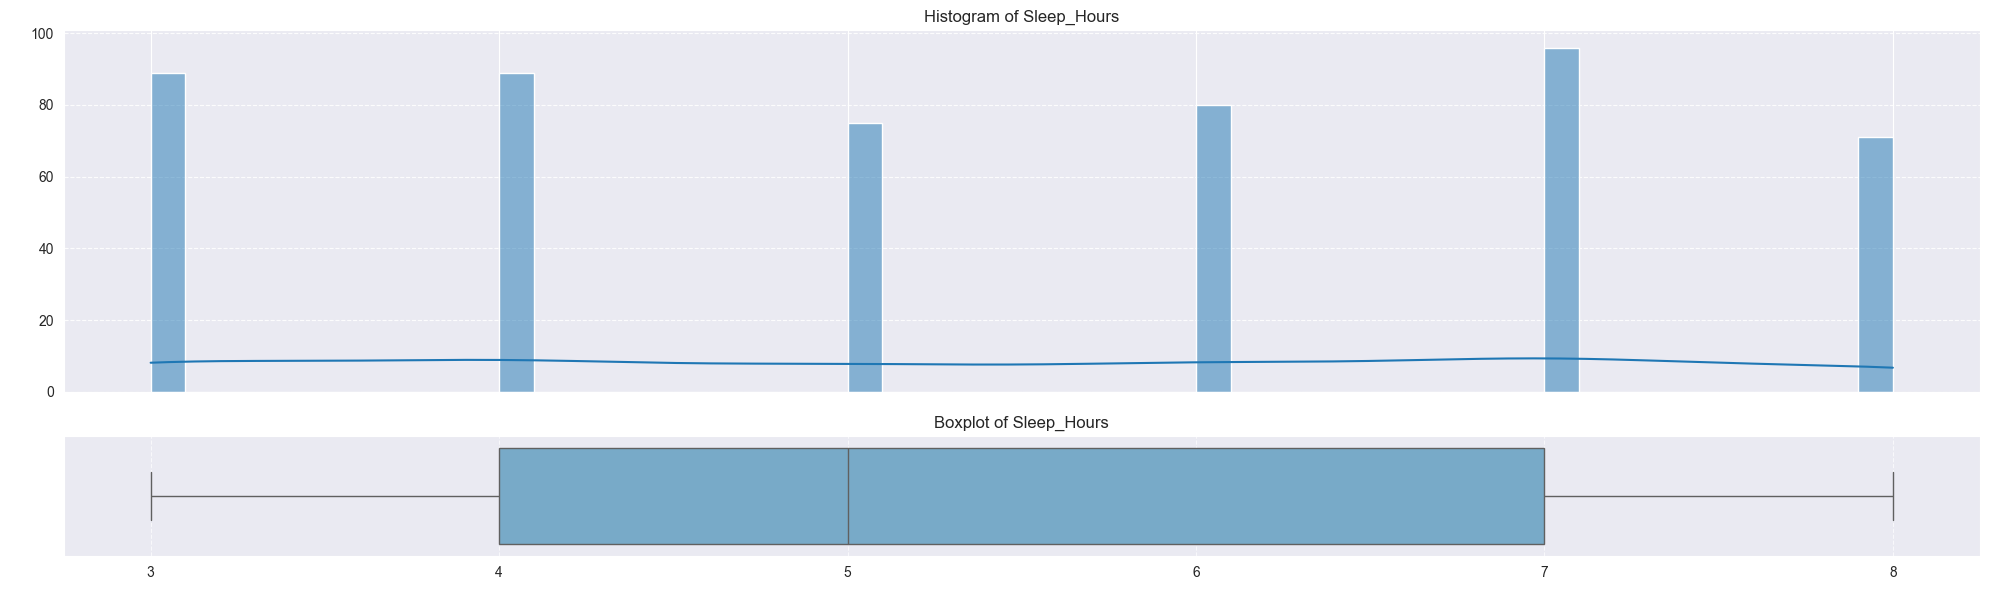

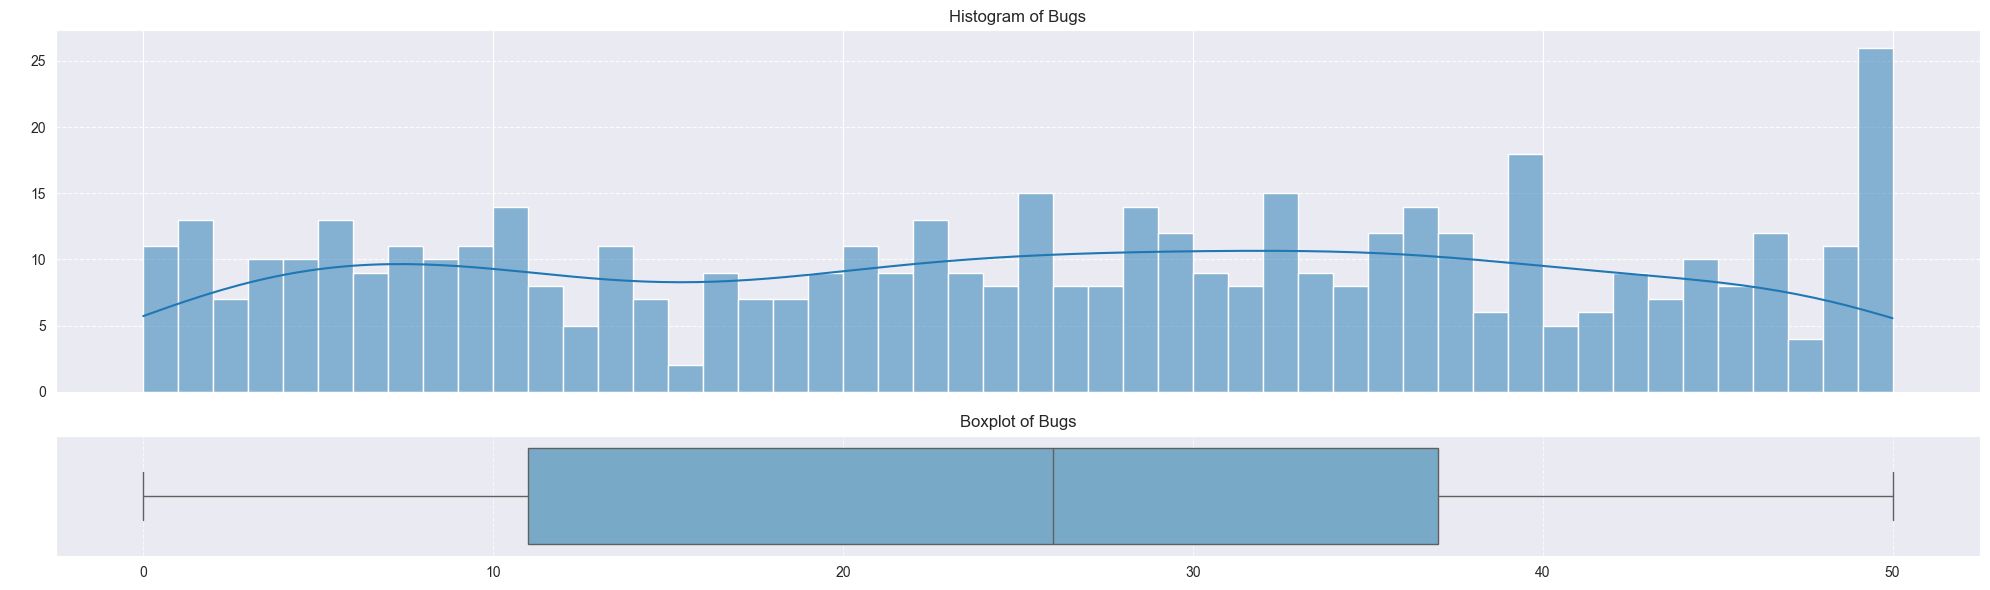

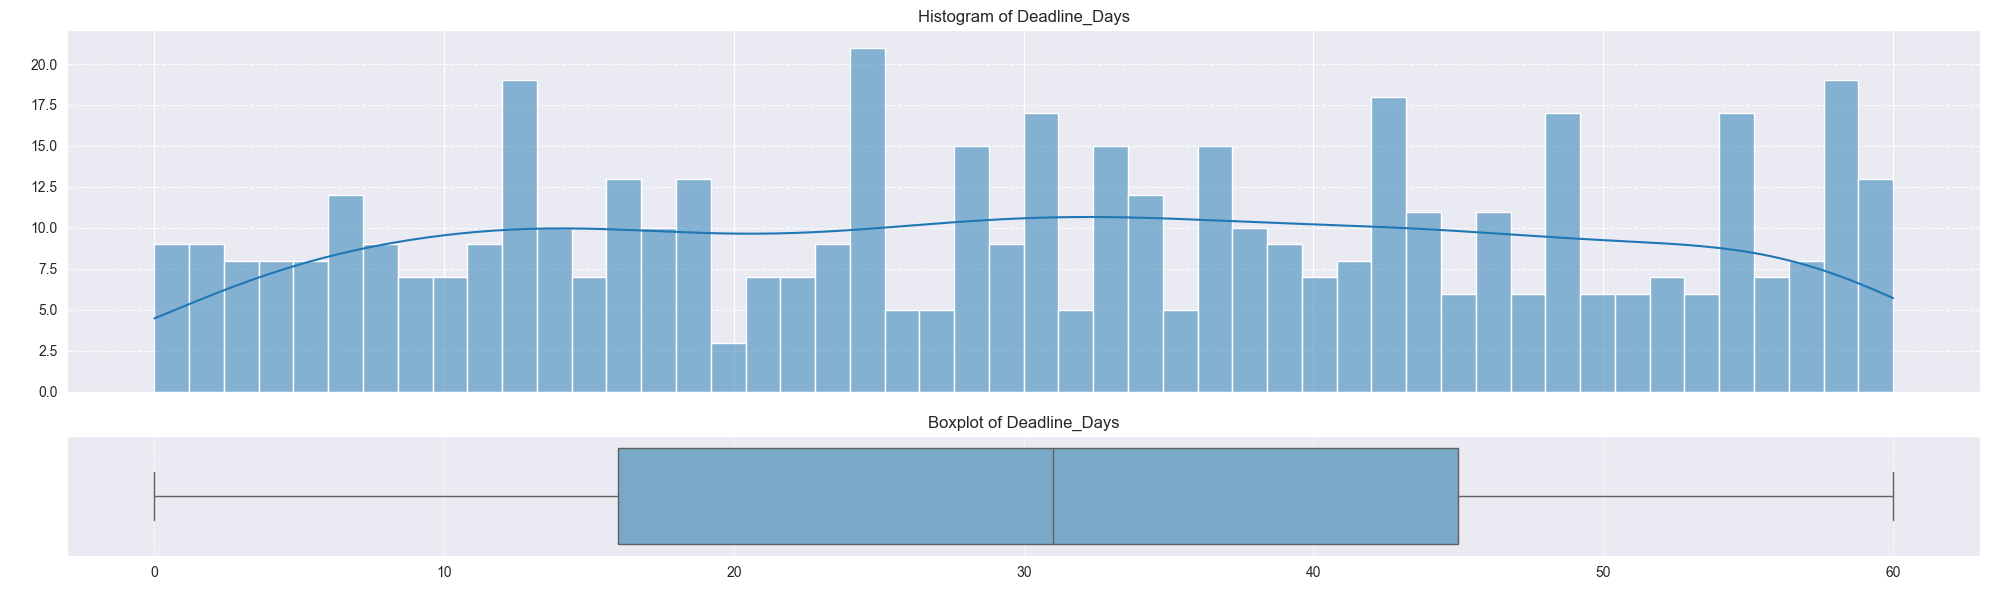

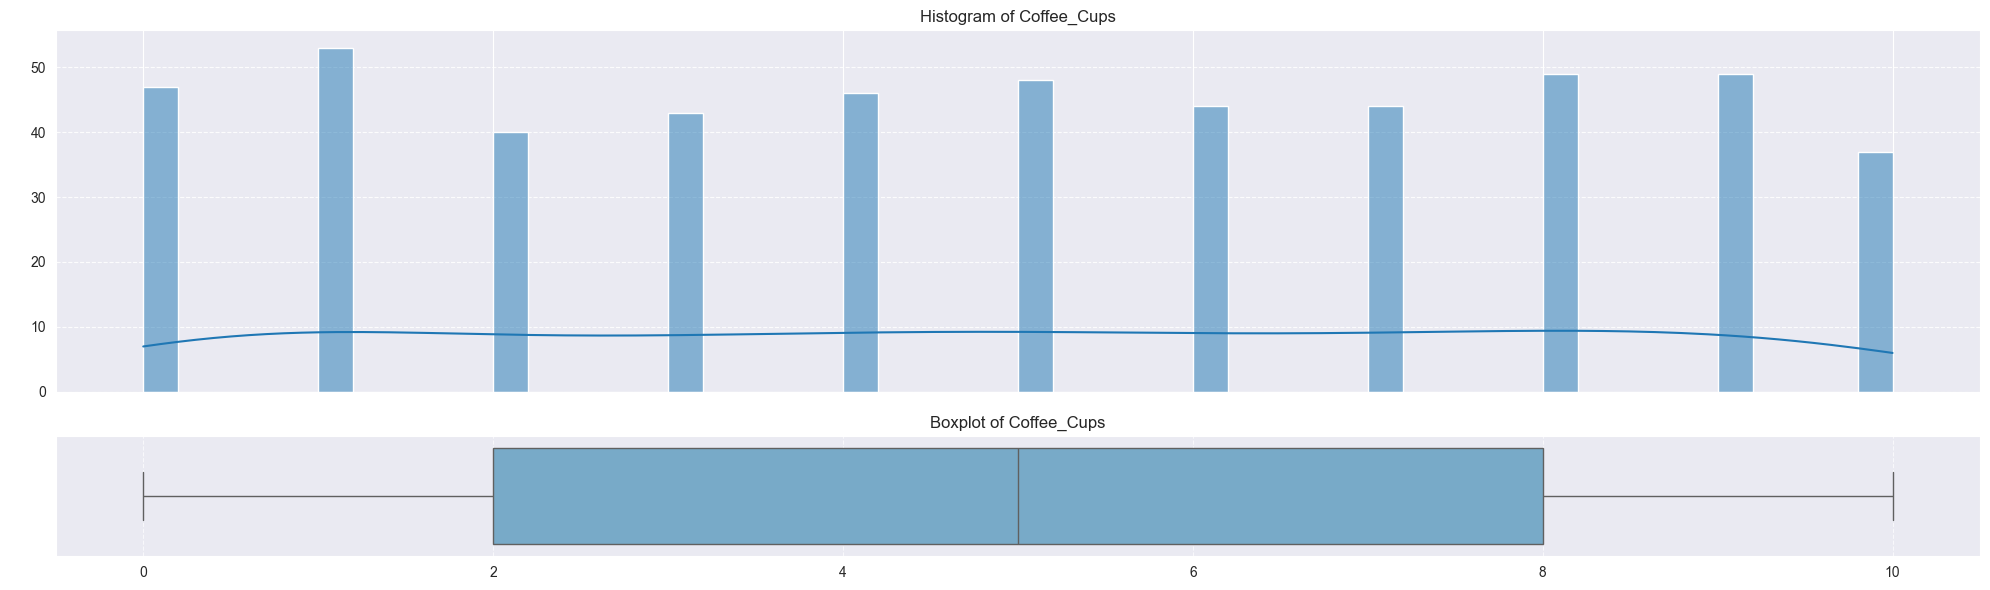

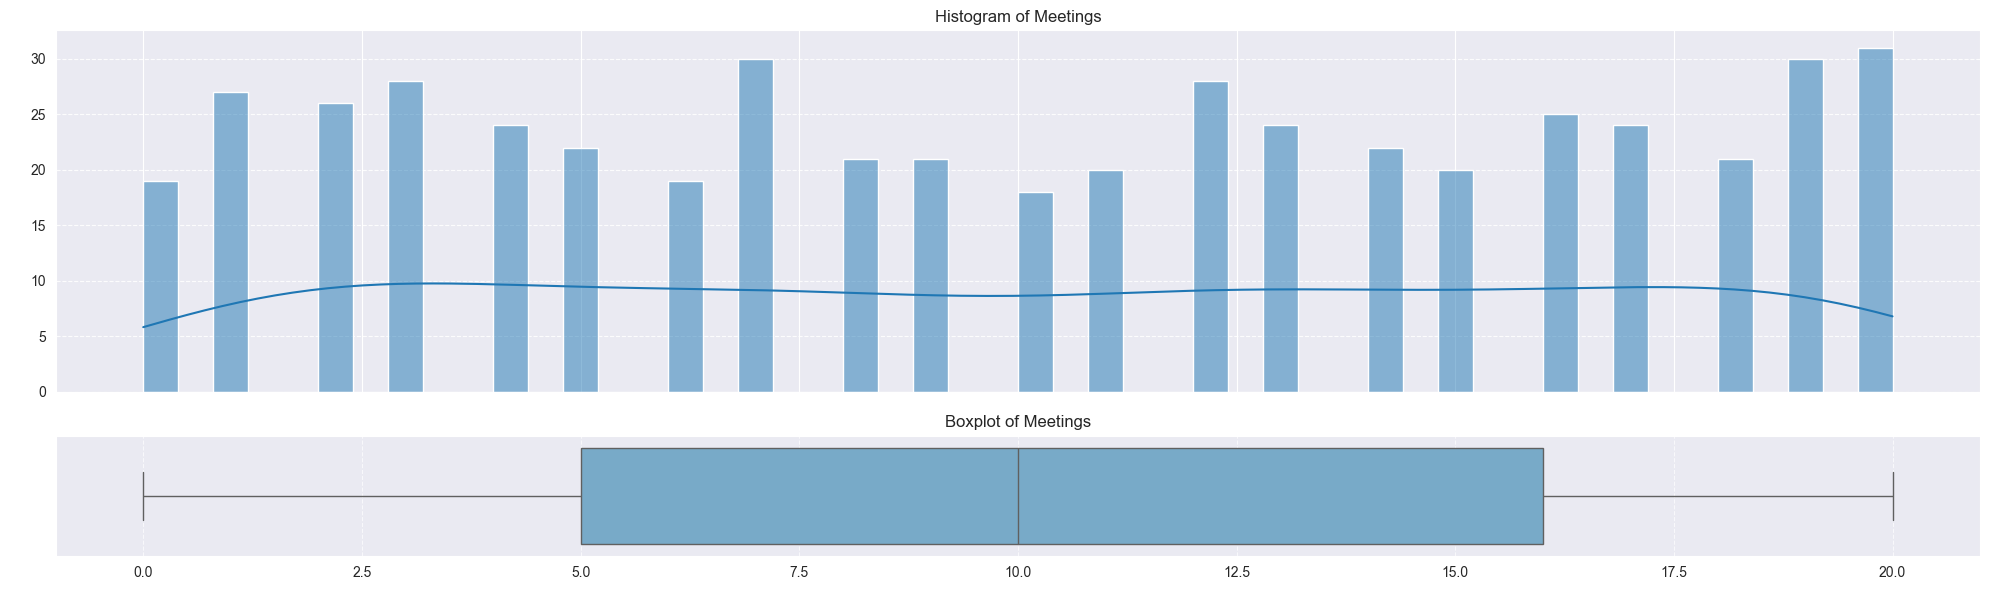

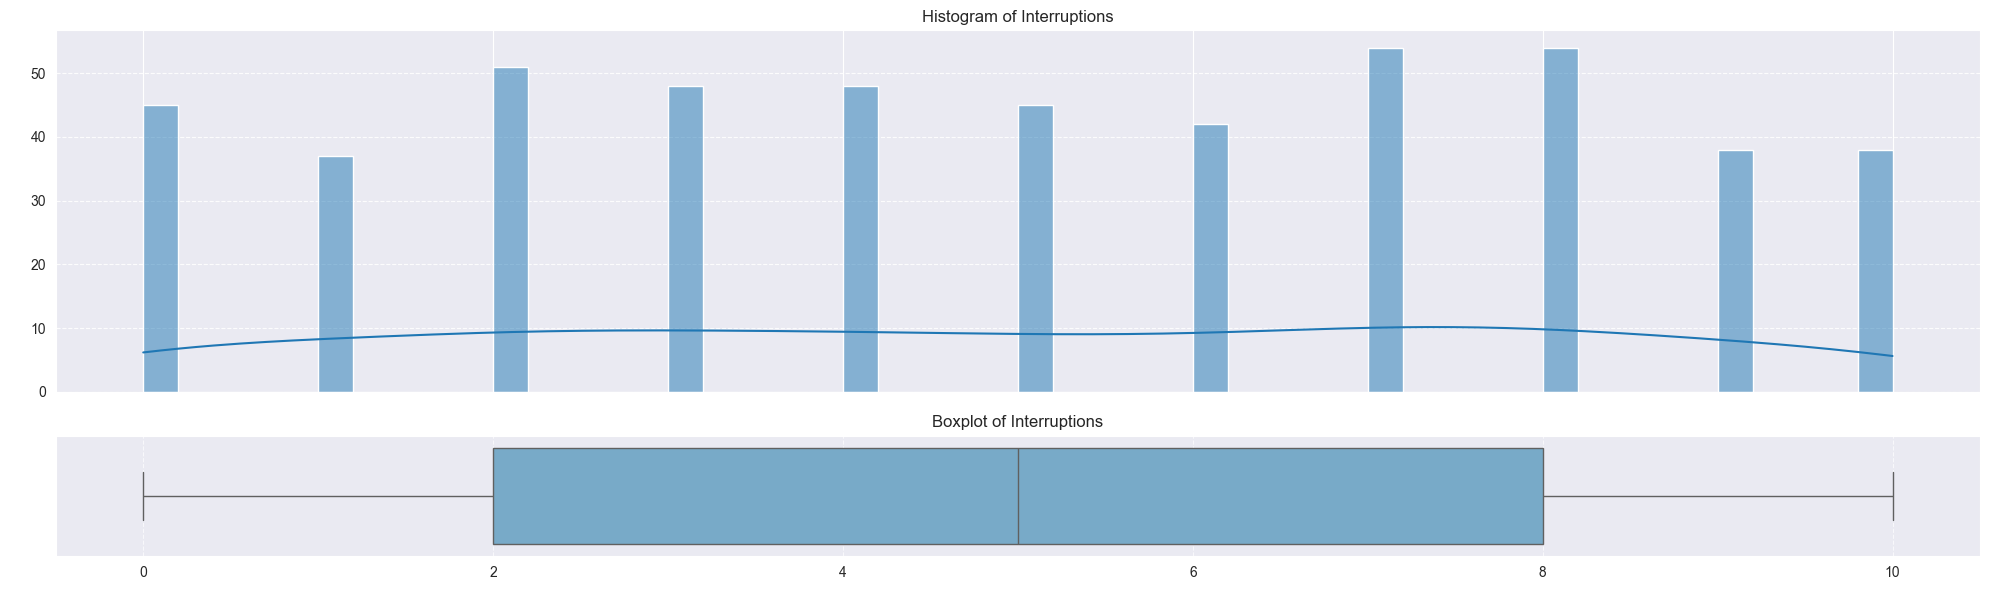

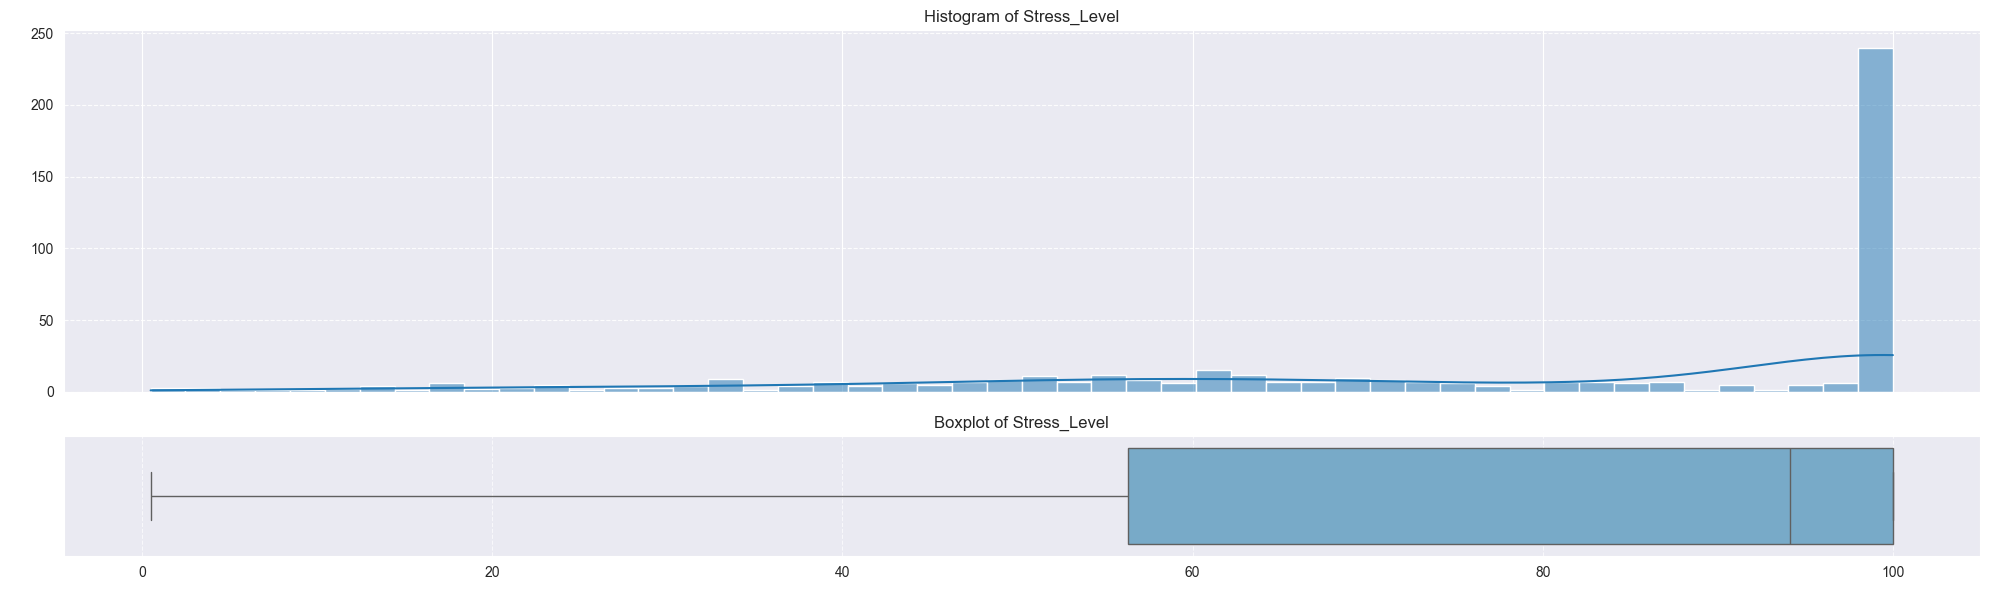

In [14]:
for col in numerical_cols:
    fig, axes = plt.subplots(2, 1, figsize=(20, 6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

    # Histograma con KDE
    sns.histplot(df[col], bins=50, kde=True, palette='Blues', ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].grid(True, axis='y', linestyle='--', alpha=0.9)
    axes[0].set_ylabel(" ", fontsize=12)
    

    # Boxplot horizontal
    sns.boxplot(x=df[col], palette='Blues', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].grid(True, axis='x', linestyle='--', alpha=0.7)
    axes[1].set_ylabel(" ", fontsize=12)
    axes[1].set_xlabel("", fontsize=12)

    
    plt.tight_layout()
    plt.show()

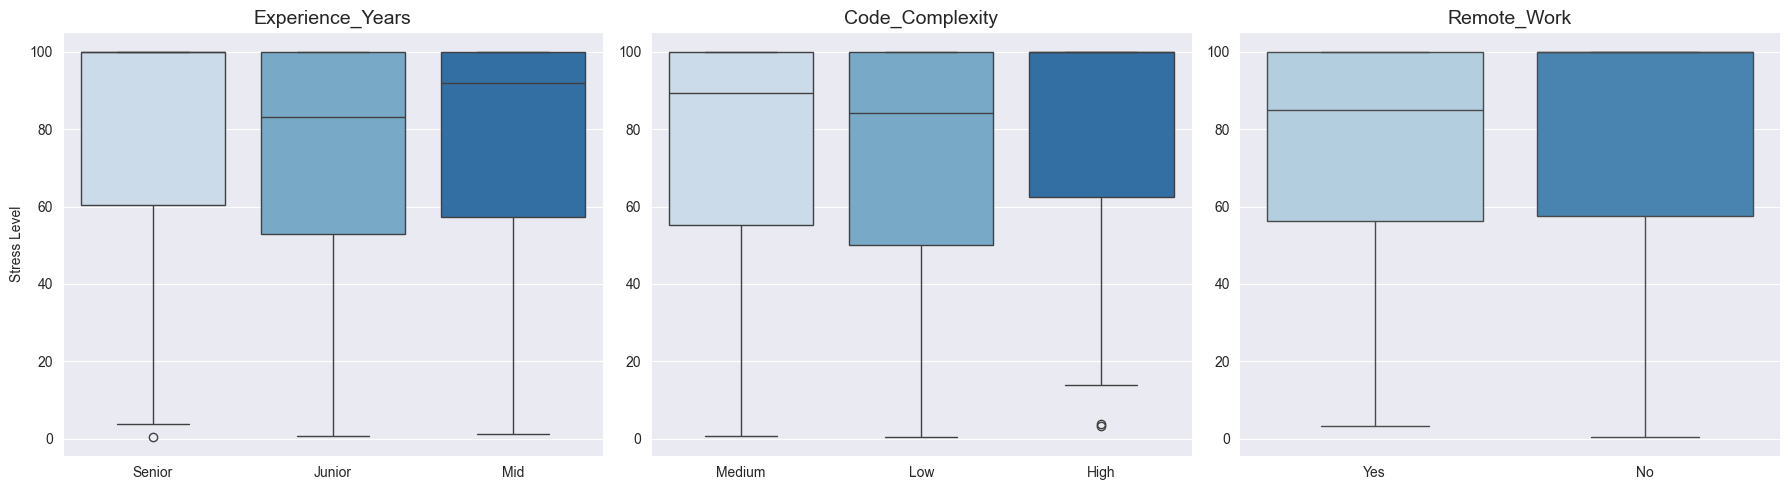

In [15]:
# Distribuciones de variables categóricas
fig, axes = plt.subplots(1, len(categorical_cols),figsize=(6 * len(categorical_cols), 5))

for i, cat in enumerate(categorical_cols):
    sns.boxplot(
        x=cat,
        y='Stress_Level',
        data=df,
        palette='Blues',
        ax=axes[i]          # ← CLAVE
    )
    
    axes[i].set_title(cat, fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Stress Level" if i == 0 else "")
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


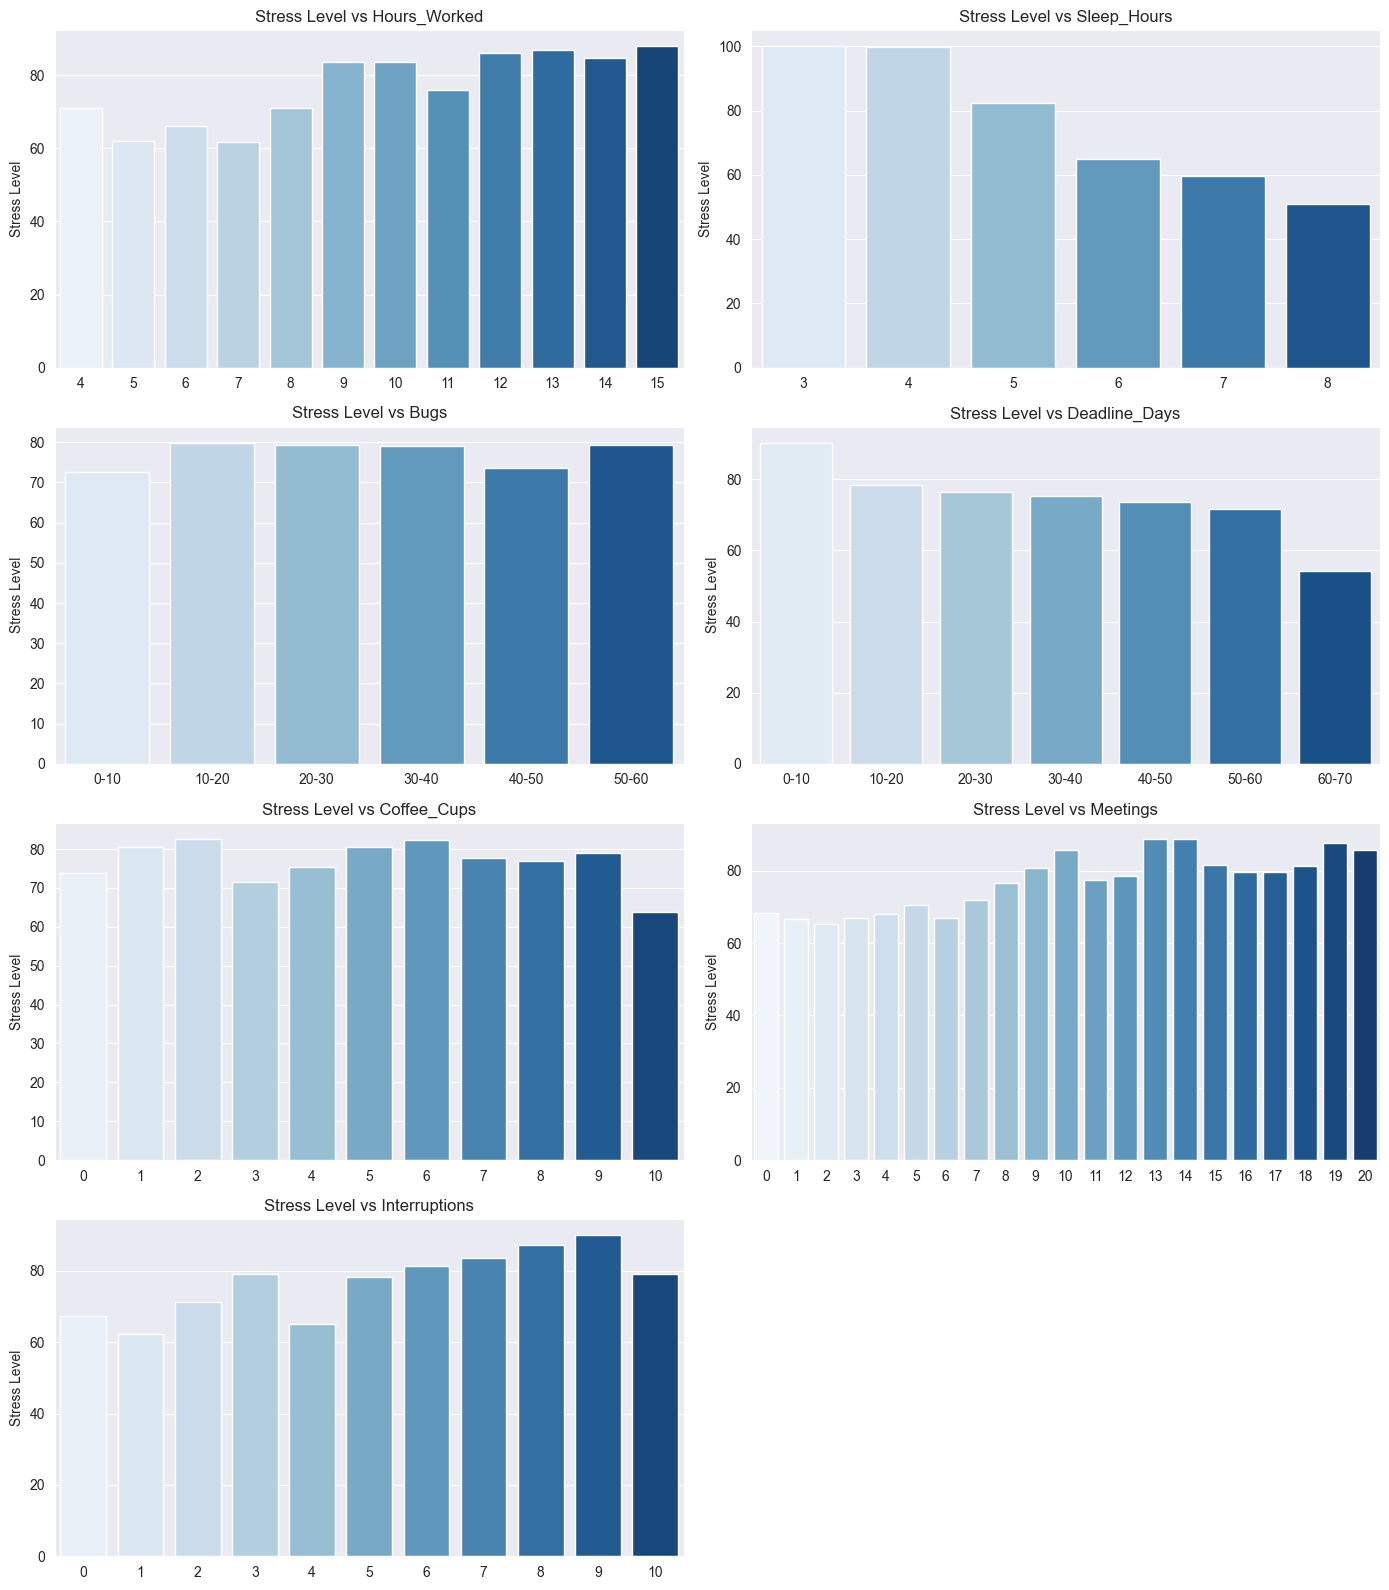

In [16]:
numerical_cols = numerical_cols.drop('Stress_Level')

import math
n_cols = 2
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    
    ax = axes[i]
    
    # ---- CASO ESPECIAL: Bugs ----
    if col == 'Bugs':
        df['Bugs_bin'] = pd.cut(
            df['Bugs'],
            bins=range(0, df['Bugs'].max() + 11, 10),
            right=False
        )

        df['Bugs_bin'] = df['Bugs_bin'].apply(
            lambda x: f"{int(x.left)}-{int(x.right)}"
)
        
        sns.barplot(
            x='Bugs_bin',
            y='Stress_Level',
            data=df,
            palette='Blues',
            ci=None,
            ax=ax
        )
    
    # ---- CASO ESPECIAL: Deadline_Days ----
    elif col == 'Deadline_Days':
        df['Deadline_bin'] = pd.cut(
            df['Deadline_Days'],
            bins=range(0, df['Deadline_Days'].max() + 11, 10),
            right=False
        )

        df['Deadline_bin'] = df['Deadline_bin'].apply(
        lambda x: f"{int(x.left)}-{int(x.right)}"
)
        
        sns.barplot(
            x='Deadline_bin',
            y='Stress_Level',
            data=df,
            palette='Blues',
            ci=None,
            ax=ax
        )
    
    # ---- RESTO DE VARIABLES ----
    else:
        sns.barplot(
            x=col,
            y='Stress_Level',
            data=df,
            palette='Blues',
            ci=None,
            ax=ax
        )

    ax.set_title(f'Stress Level vs {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Stress Level')
    ax.tick_params(axis='x', rotation=0)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



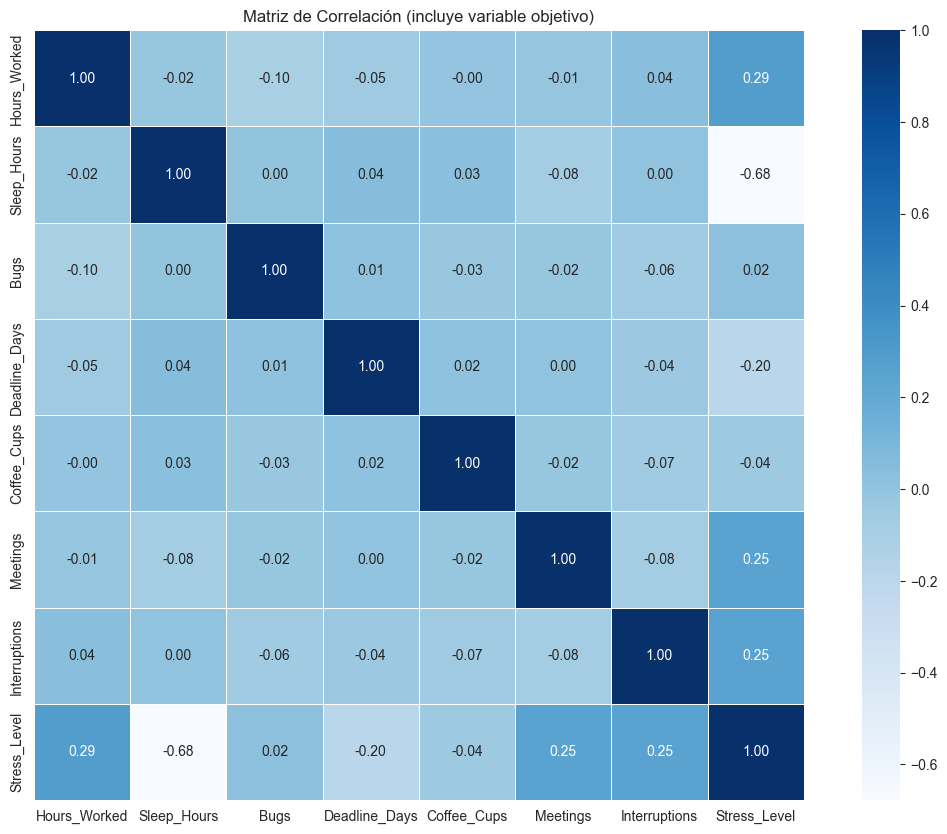

In [17]:
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Matriz de Correlación (incluye variable objetivo)")
plt.show()


In [18]:
experience_map = {'Junior': 0,'Mid': 1,'Senior': 2}
df['Experience_Years'] = df['Experience_Years'].map(experience_map)

complexity_map = {'Low': 0,'Medium': 1,'High': 2}
df['Code_Complexity'] = df['Code_Complexity'].map(complexity_map)

remote_map = {'No': 0,'Yes': 1}
df['Remote_Work'] = df['Remote_Work'].map(remote_map)



In [19]:
df[['Experience_Years', 'Code_Complexity', 'Remote_Work']].isna().sum()


Experience_Years    0
Code_Complexity     0
Remote_Work         0
dtype: int64

In [20]:
df.drop(columns=['Bugs_bin'], inplace=True)
df.drop(columns=['Deadline_bin'], inplace=True)

In [21]:
df.head()

,Hours_Worked,Sleep_Hours,Bugs,Deadline_Days,Coffee_Cups,Meetings,Interruptions,Experience_Years,Code_Complexity,Remote_Work,Stress_Level
0,10,8,25,53,4,9,2,2,1,1,58.521033
1,7,8,33,33,2,6,9,0,1,1,47.461651
2,14,8,44,54,10,12,2,0,0,0,59.211580
3,11,6,5,46,0,13,9,1,0,1,100.000000
4,8,7,36,23,9,3,2,0,1,1,28.784957


In [22]:
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:\n  Mean Squared Error: {mse:.2f}\n  R^2 Score: {r2:.2f}\n")

Linear Regression:
  Mean Squared Error: 269.47
  R^2 Score: 0.56

Ridge Regression:
  Mean Squared Error: 269.38
  R^2 Score: 0.56

Lasso Regression:
  Mean Squared Error: 262.45
  R^2 Score: 0.57

Random Forest:
  Mean Squared Error: 74.49
  R^2 Score: 0.88

Decision Tree:
  Mean Squared Error: 139.92
  R^2 Score: 0.77

Support Vector Regressor:
  Mean Squared Error: 795.79
  R^2 Score: -0.29



In [26]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [27]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance

Sleep_Hours         0.445835
Hours_Worked        0.205710
Interruptions       0.116306
Meetings            0.114478
Deadline_Days       0.076972
Bugs                0.024963
Coffee_Cups         0.008127
Code_Complexity     0.003316
Experience_Years    0.002645
Remote_Work         0.001647
dtype: float64

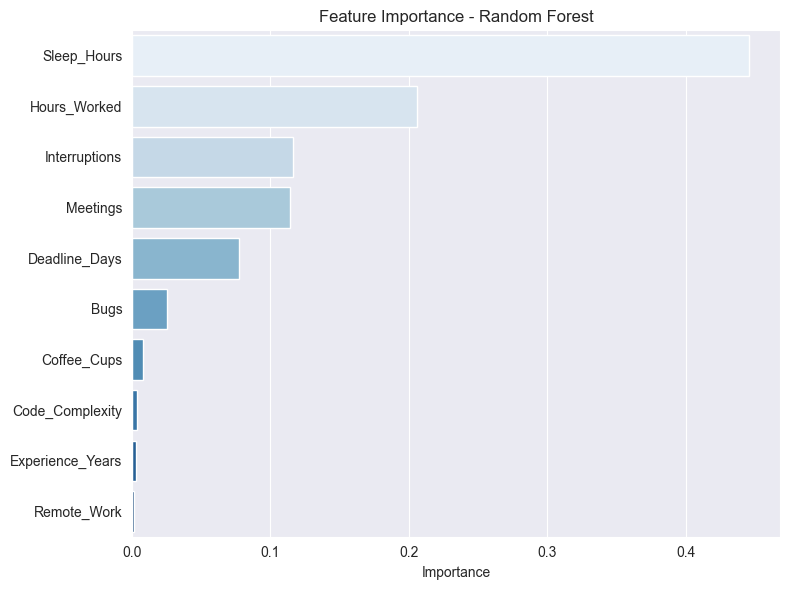

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(
    x=feature_importance.values,
    y=feature_importance.index,
    palette="Blues"
)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [29]:
cv_scores = cross_val_score(
    rf,
    X_train,
    y_train,
    cv=5,
    scoring='r2'
)

print("R2 scores:", cv_scores)
print("Mean R2:", cv_scores.mean())
print("Std R2:", cv_scores.std())


R2 scores: [0.89620749 0.90308825 0.87696287 0.91601818 0.84445681]
Mean R2: 0.8873467163095345
Std R2: 0.024882646125556632


In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV R2:", grid.best_score_)


Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV R2: 0.8898448815262698


In [31]:
best_rf = grid.best_estimator_


In [61]:
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=2,
    random_state=42
)

best_rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [62]:
# Train
y_train_pred = best_rf.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

# Test
y_test_pred = best_rf.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("TRAIN -> R2:", r2_train, "MSE:", mse_train)
print("TEST  -> R2:", r2_test, "MSE:", mse_test)


TRAIN -> R2: 0.9760565786339424 MSE: 19.154675231280297
TEST  -> R2: 0.8885524814760504 MSE: 68.71096825614632
